## Multiple Linear Regression

Before proceeding with multi-linear regression, Let's discuss about the key differences between the linear and the multi-linear regression

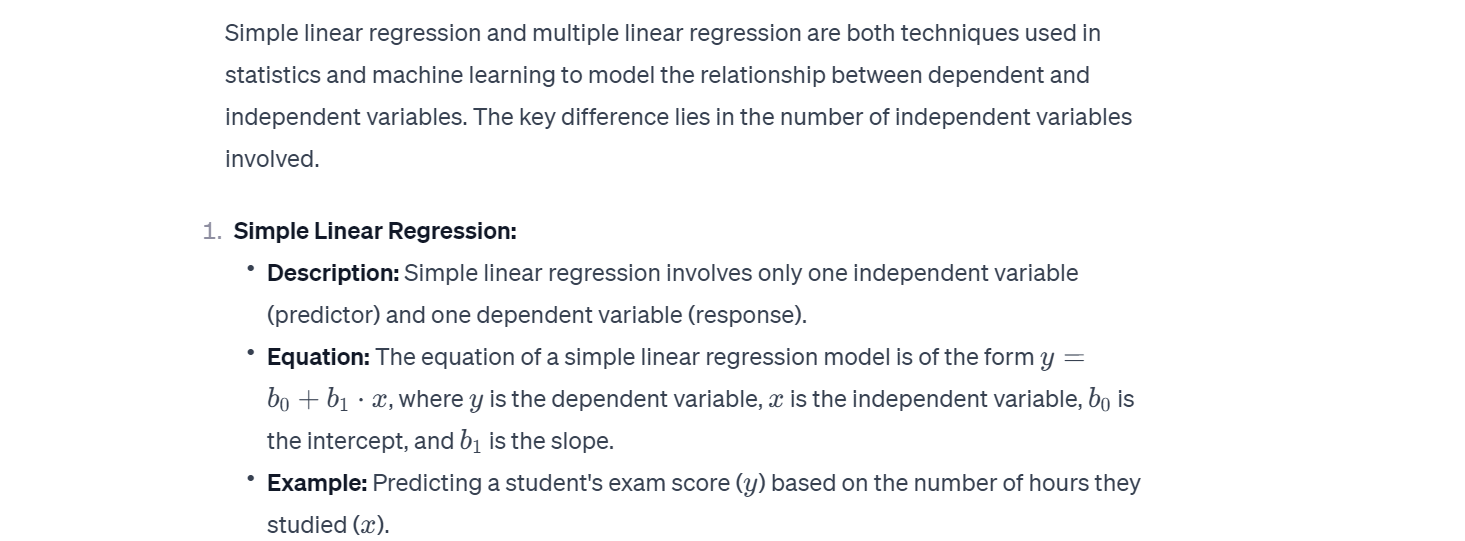

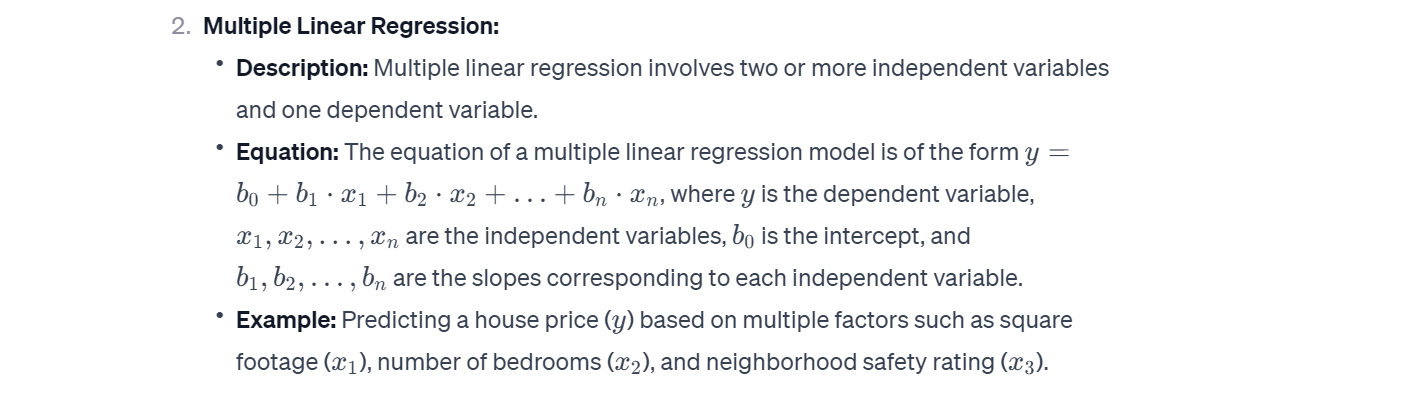

### Key Differences between simple linear and the multiple linear regression:

1. Simple linear regression deals with only one independent variable, while multiple linear regression deals with two or more independent variables.
2. The equation for simple linear regression has only one predictor term, while the equation for multiple linear regression has multiple predictor terms.
3. In simple linear regression, the relationship between the dependent and independent variables is represented as a straight line, whereas in multiple linear regression, it is represented as a hyperplane in a higher-dimensional space.
4. Multiple linear regression allows for modeling more complex relationships by considering the impact of multiple factors on the dependent variable.

In summary, while simple linear regression is appropriate when there is a single predictor, multiple linear regression is used when there are multiple predictors influencing the dependent variable.

In [1]:
## Let's use the california housing dataset for multi linear regression problem

from sklearn.datasets import fetch_california_housing

import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
california=fetch_california_housing()

In [3]:
california

# the data in the california variable in the form of "dictionary"

# within california variable we have data, target, target_names, feature_names, description (DESCR)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [4]:
type(california)

# california is a dictionary

sklearn.utils._bunch.Bunch

In [5]:
california.keys() 

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
# Description about the data

print(california.DESCR) # Use print otherwise the output will be clumsy

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
## Extracting the independent (input feature) and dependent feature (output feature)

independent_features = california.data
dependent_feature =california.target

In [8]:
independent_features

# Data is there in clumsy format, Convert the data into dataframe to understand the data more clearly

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [9]:
ind_features=pd.DataFrame(independent_features)
dep_feature=pd.DataFrame(dependent_feature)

In [10]:
ind_features.head()

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
## we have features name details so provide the feature name to the ind_features dataframe

california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [12]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [13]:
## Let's use the above feature names for our ind_features dataframe

In [14]:
ind_features.columns=california.feature_names

# or we can provide the column names when we are converting the data into dataframe using columns parameter

# pd.DataFrame(california.data,columns=california.feature_names)

In [15]:
ind_features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
## Succesfully we have provided the colunn names to our ind_features data

In [17]:
## Similary extract the name for the dependen feature dataframe from california.target_names

In [18]:
dep_feature

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [19]:
dep_feature.columns=california.target_names

In [20]:
dep_feature

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [21]:
ind_features # Independent features 

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [22]:
dep_feature # Dependent features

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [23]:
ind_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [24]:
dep_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedHouseVal  20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [25]:
## As per above statistics we can observe there is no null values so, we don't need to impute any values ( not need to fill nan values)

In [26]:
## As we have multiple independent features we will use "Multi linear regression" to predict the price (continuos output)

In [27]:
ind_features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [28]:
## Checking if the data having any missing values ( we can also check in ind_features.info())

In [29]:
ind_features.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In the Pandas library, both isna() and isnull() functions are used to detect missing values in a DataFrame or Series. They are essentially the same function and can be used interchangeably. The only difference between them is their names.

In [30]:
ind_features.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [31]:
# Combine both indepenent feature and dependent feature

dataset= pd.concat([ind_features,dep_feature],axis=1)

In [32]:
dataset

#MedHouseVal is the target variable

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [33]:
dataset.describe()

# Statistical observations

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [34]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

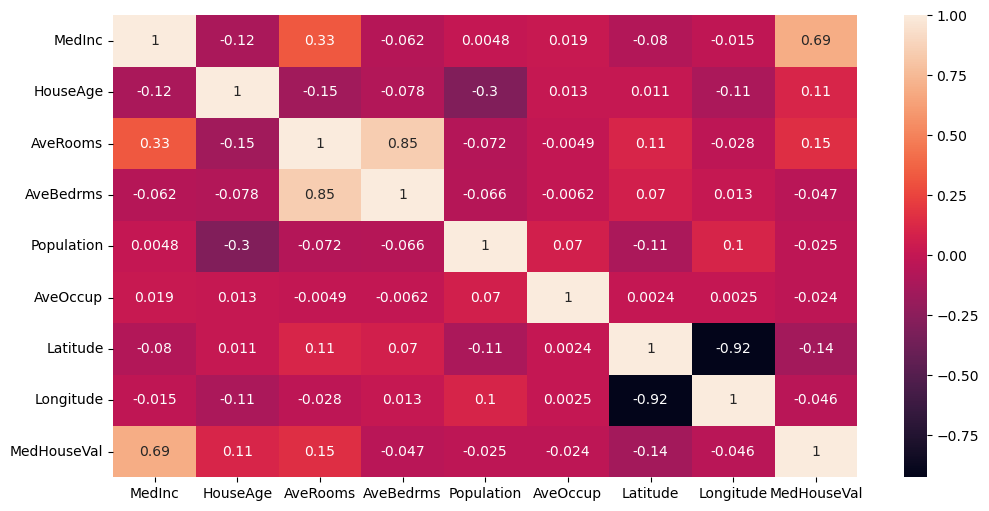

In [35]:
plt.figure(figsize=(12,6))
sns.heatmap(dataset.corr(),annot=True)

# Drawing the heatmap for the correlation values to find the relation between the independent and dependent features

In [36]:
# As we can observe the feature MedInc has positive correlation with dependent feature (MedHouseVal)
# Features: HouseAge, AveRooms has less positive correlation
# Features: AveBedrms, Population, AveOccup, Latitude, Longitude has negative correlation with the dependent feature or target feature

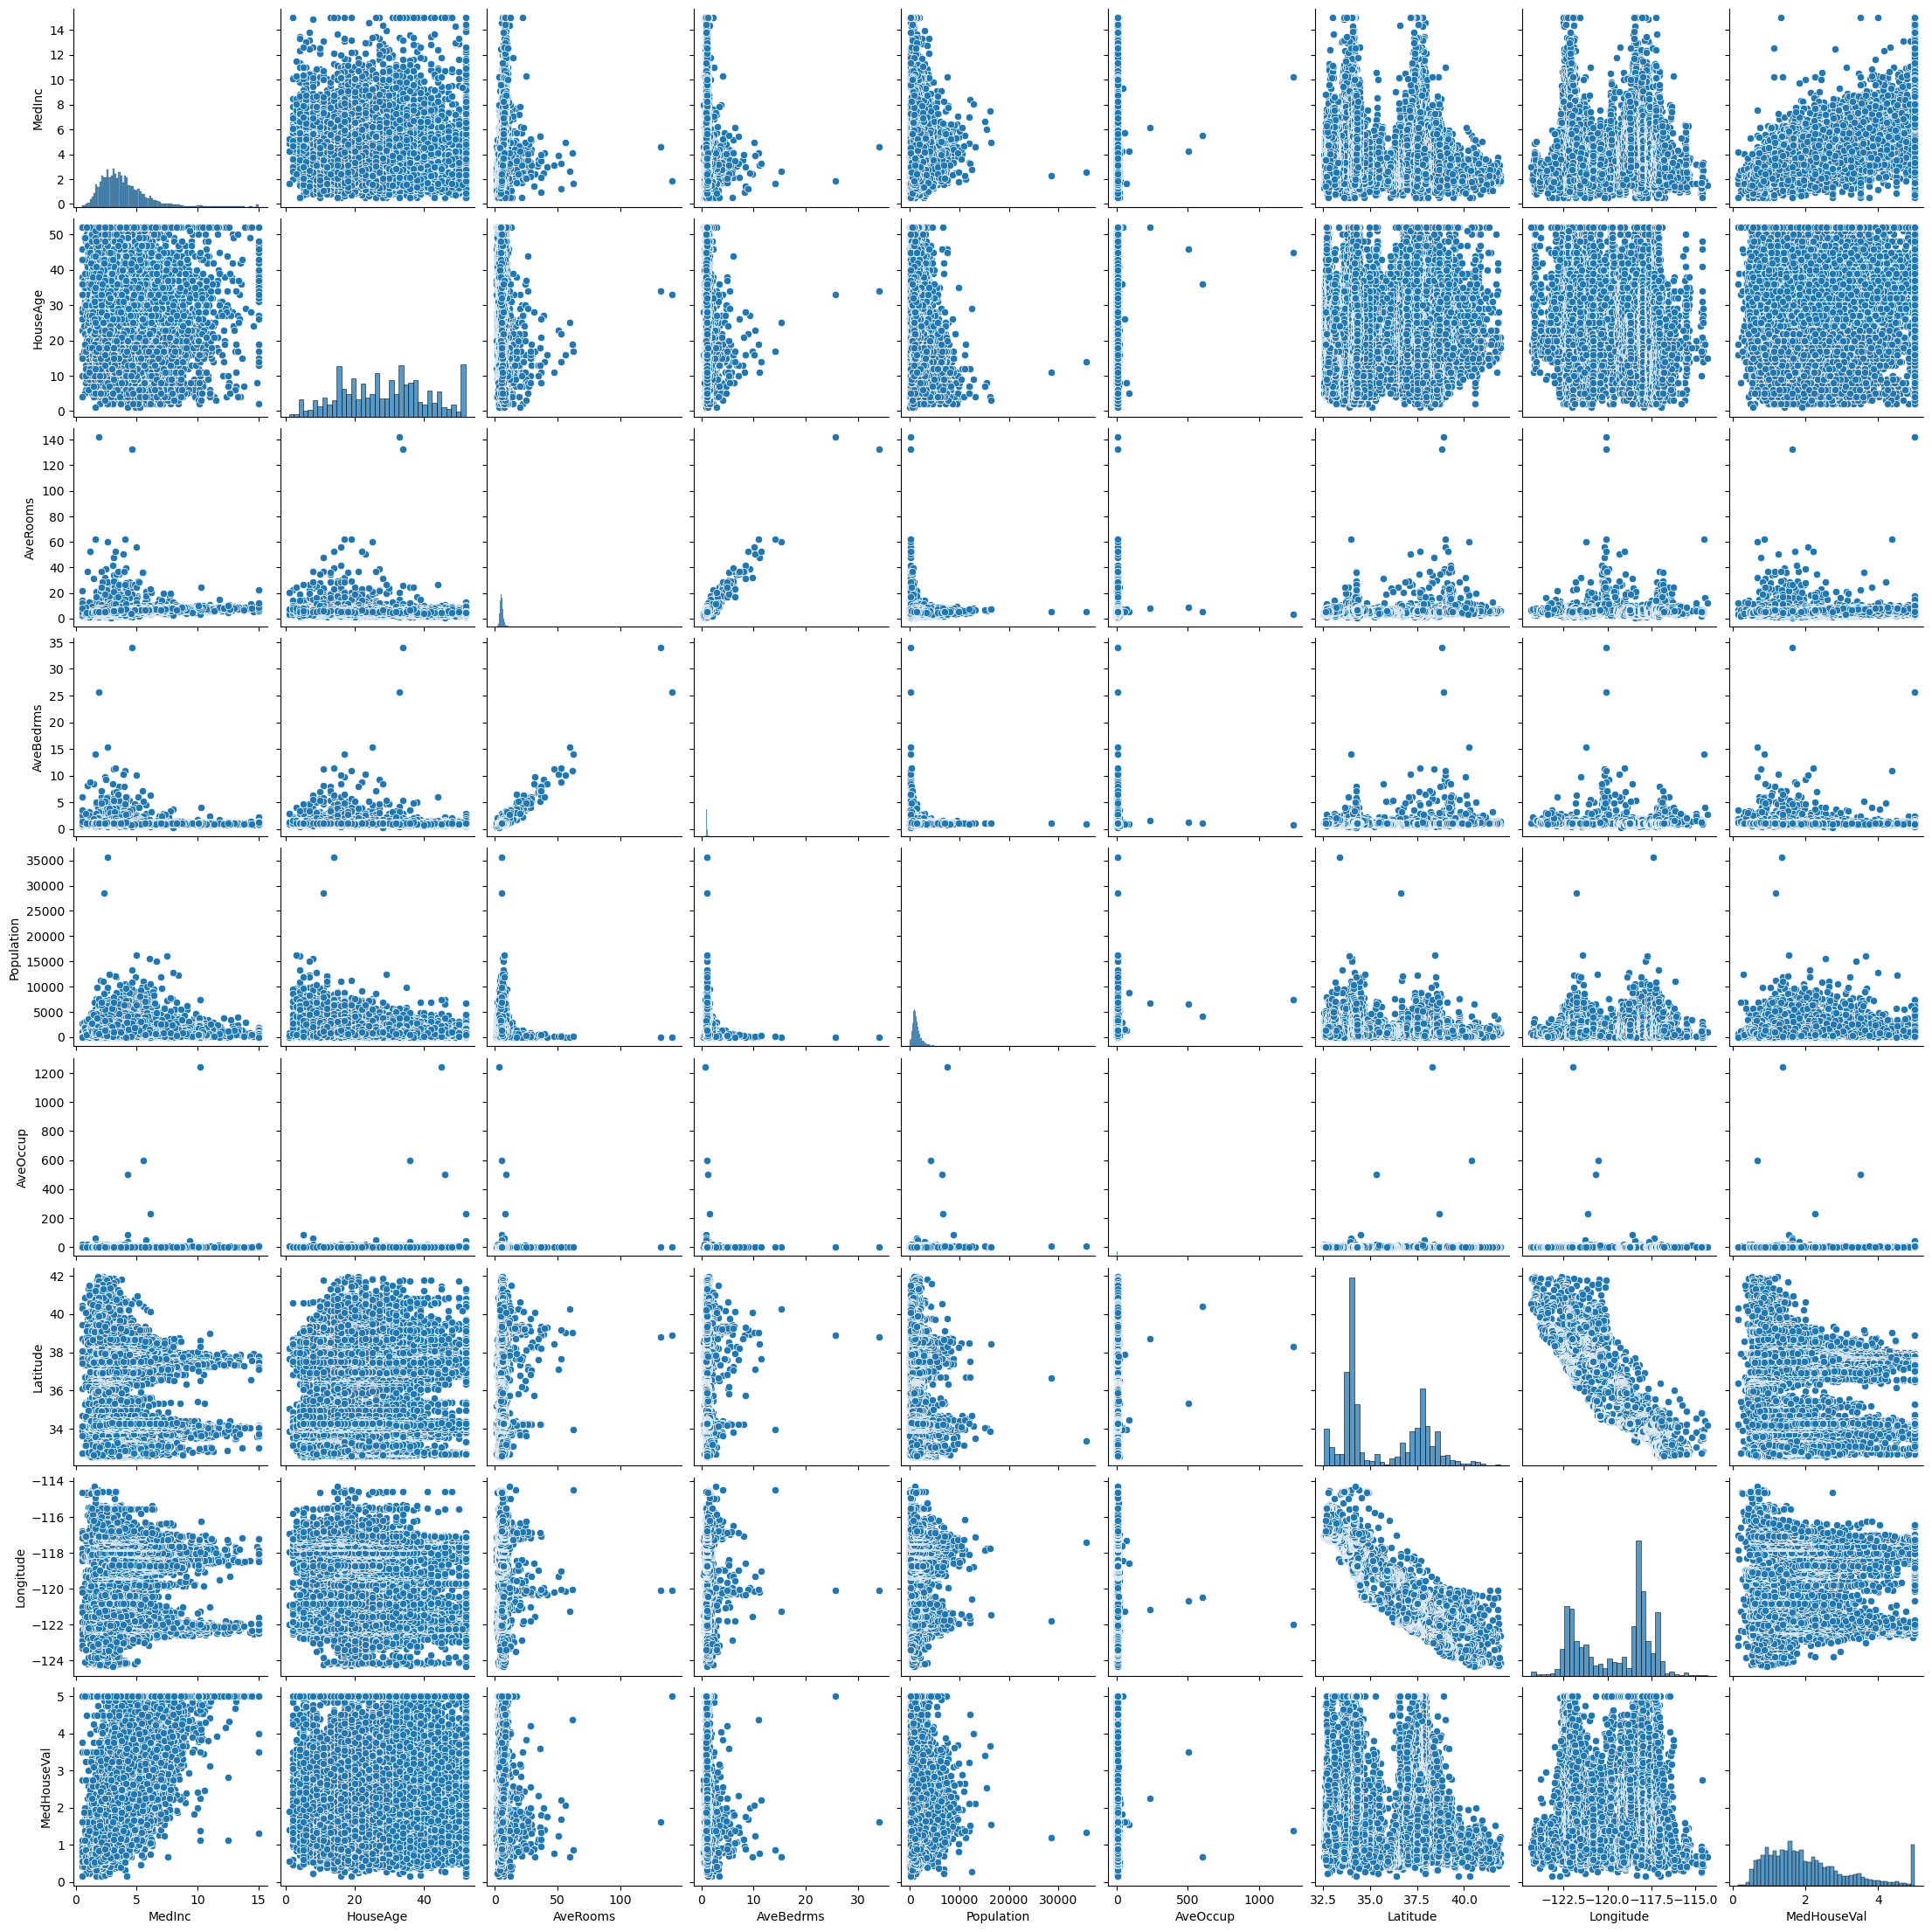

In [37]:
sns.pairplot(dataset)

In [38]:
## As we can see all the independent features are not in linear relationship with the output features, It will effect the model
# performance and we will also get high MAE,MSE,RMSE errors.

## Steps in the machine learning algorithm

In [39]:
# 1. Initially divide the independent features and dependent features
# 2. Perform the test train split
# 3. Standardize the data
# 4. Train the model using linear regression model

In [40]:
## Let's divide the independent feature and dependent feature from the dataframe "dataset"
# Initially we have already divided ind_features and dep_feature, we can use those as well or you can run the below code to 
# extract the independent and the dependent feature from dataset dataframe.

ind_features= dataset.drop("MedHouseVal",axis=1) # Independent features
dep_feature=dataset[["MedHouseVal"]] # Dependent feature

# or

# ind_features= dataset.iloc[:,:-1]
# dep_feature=dataset.iloc[:,-1]

In [41]:
ind_features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [42]:
dep_feature

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [43]:
# Rename the independent feature and dependent feature names to X and y for our simple understanding

X=ind_features.copy()
y=dep_feature.copy()

In [44]:
X # Independent features

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [45]:
y # Dependent feature

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [46]:
## Peform the train test split

from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# we didn't specified the train size but test train split automatically takes train_size as 1-test_size i,e 0.80

In [48]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80


In [49]:
X_train.shape ## 80% of total records (20640) == 16512

(16512, 8)

In [50]:
X_test.shape ## 20% of total records (20640) == 4128

(4128, 8)

In [51]:
y_train.head()

,MedHouseVal
14196,1.030
8267,3.821
17445,1.726
14265,0.934
2271,0.965


In [52]:
y_test.head()

,MedHouseVal
20046,0.47700
3024,0.45800
15663,5.00001
20484,2.18600
9814,2.78000


In [53]:
y_train.shape, y_test.shape # Training and testing dependent features

((16512, 1), (4128, 1))

In [54]:
## As we are using multiple linear regression we need to standardize the features

In [55]:
from sklearn.preprocessing import StandardScaler

# creating object for StandardScaler

scaler= StandardScaler()

In [56]:
scaler.fit_transform(X_train)

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [57]:
X_train=scaler.fit_transform(X_train)

In [58]:
X_train

array([[-0.326196  ,  0.34849025, -0.17491646, ...,  0.05137609,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.40283542, ..., -0.11736222,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.08821601, ..., -0.03227969,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.60675918, ...,  0.02030568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.40217517, ...,  0.00707608,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -0.85144571, ..., -0.08535429,
         0.99543676, -1.41489815]])

In [59]:
## standardize the test data as well with the scaler object

X_test=scaler.transform(X_test)

In [60]:
## We won't standardize the y_train and y_test values because they are the dependent or target features that we need to predict and train.

## Model Training

In [61]:
## Train the model with the training data

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [62]:
regressor.fit(X_train,y_train)

LinearRegression()

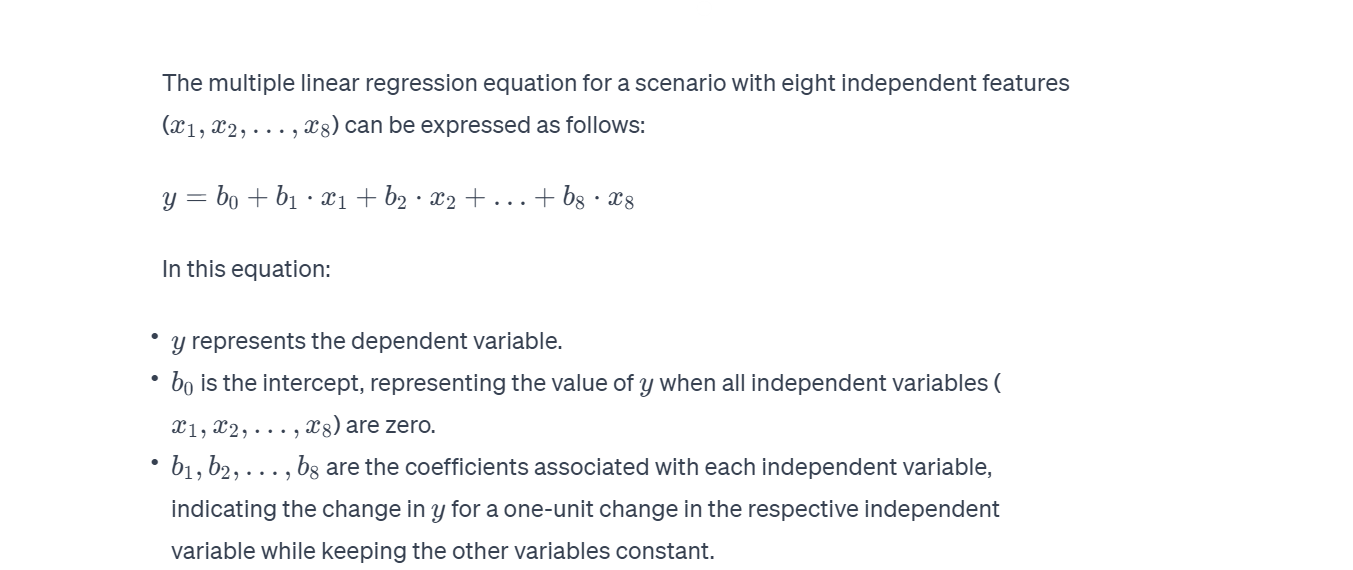

In [63]:
# Slope or co-efficients

regressor.coef_

# As we have 8 independent features we are getting 8 coefficient's (8 slope values)

# 8 co-efficients= θ1,θ2,θ3,.....,θ8 or b1,b2,b3,b4,....,b8

array([[ 0.85438303,  0.12254624, -0.29441013,  0.33925949, -0.00230772,
        -0.0408291 , -0.89692888, -0.86984178]])

In [64]:
# Intercept

regressor.intercept_ # we will have only one intercept

##b0 value or θ0 value

array([2.07194694])

In [65]:
## Prediction for the test data

y_pred=regressor.predict(X_test)

In [66]:
## Now we have predicted the values for the X_test data. Now we will use performance metrics to calculate the accuracy between
# y_pred and y_test data

## Performance metrics

In [67]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [68]:
# MAE

mean_absolute_error(y_test,y_pred)

0.5332001304956565

In [69]:
# MSE
mse=mean_squared_error(y_pred,y_test)
print(mse)

0.5558915986952442


In [70]:
# RMSE

print(np.sqrt(mse))

0.7455813830127763


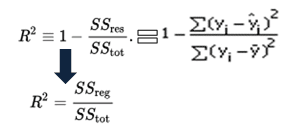

In [71]:
# R_square

score=r2_score(y_pred,y_test)
print(score)

# Best possible score is 1.0 and it can be negative (because the
# model can be arbitrarily worse). In the general case when the true y is
# non-constant, a constant model that always predicts the average y
# disregarding the input features would get a :math:`R^2` score of 0.0.

## we are getting very less value for the r_score that means our having high SSres value (Refer above snippet) 
# SSres= sum of the squares of error (actual - predicted value)

0.33767016589309906


In [72]:
## we are getting very less r-squared value

In [73]:
## Adjusted R square

## 

adj_r_square = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(adj_r_square)

## very very less value

0.3363837763148385


In [74]:
# The problem with multiple linear regression is "if the data is not linearly correlated with output features then we get more
# error (MZE,MSE,RMSE) and performance of the model is also very poor.""

## If the error between test value and the predicted value is high then automatically we will get high MAE, MSE, RMSE.
## If error is high, then performance of the model also will be less 
## performance is calculated using R-squared and Adjusted R-square metrics.

## Assumptions

In order to understand whether our predictions was good or not we have some assumptions

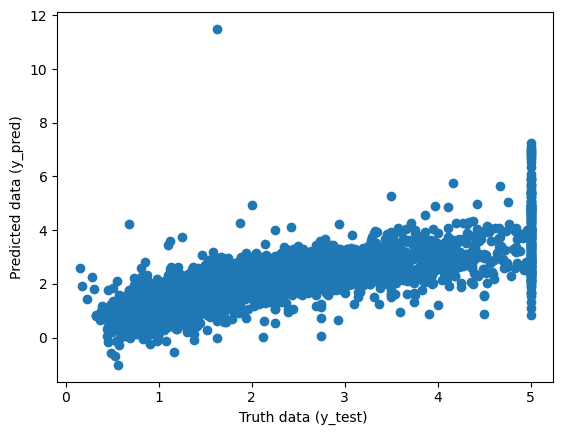

In [75]:
plt.scatter(y_test,y_pred)
plt.xlabel("Truth data (y_test) ")
plt.ylabel("Predicted data (y_pred)")
plt.show()

In [76]:
## 1. Here we have some linear relationship between the y_test and y_pred so that we can assume there is little accuracy.
# If we have pure linear relationship then that means we will have good accuracy.

2. Residuals should follow normal distribution

In [77]:
residuals= y_test-y_pred

In [78]:
residuals

,MedHouseVal
20046,-0.242123
3024,-1.306017
15663,2.290351
20484,-0.652926
9814,0.175343
...,...
15362,0.641254
16623,0.418161
18086,0.531240
2144,-0.464511


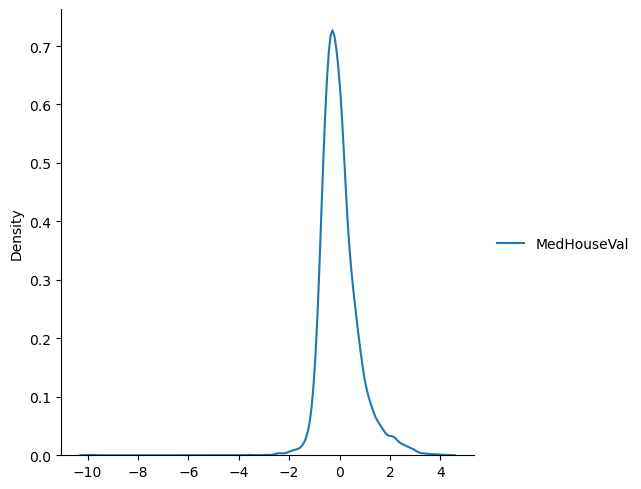

In [79]:
sns.displot(residuals,kind="kde")
sns.set_style()

In [80]:
## Here residuals distribution following normal distribution that means our model is doing good job.

## Still we can improve the model performance of model using the different algorithms

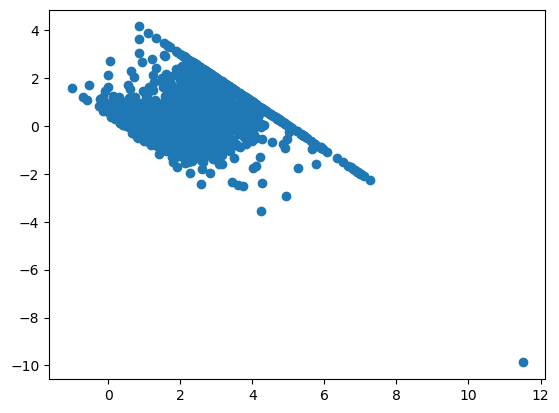

In [81]:
# 3. Plotting the residuals vs predicted values (It should be uniform)

## for a good model, we will get residuals value almost zero, so if residual value is 0, then we will get uniform distribution.

plt.scatter(y_pred,residuals)

In [82]:
## Here the ditribution is not uniform dist (uniform distribution doesn't have patterns) 
# so that we can understood the model is not performing well on the data. ( we are getting high residuals)
# we can use different machine learning algorithm to improve the performance of the model.

**Perfect Uniform distribution:**

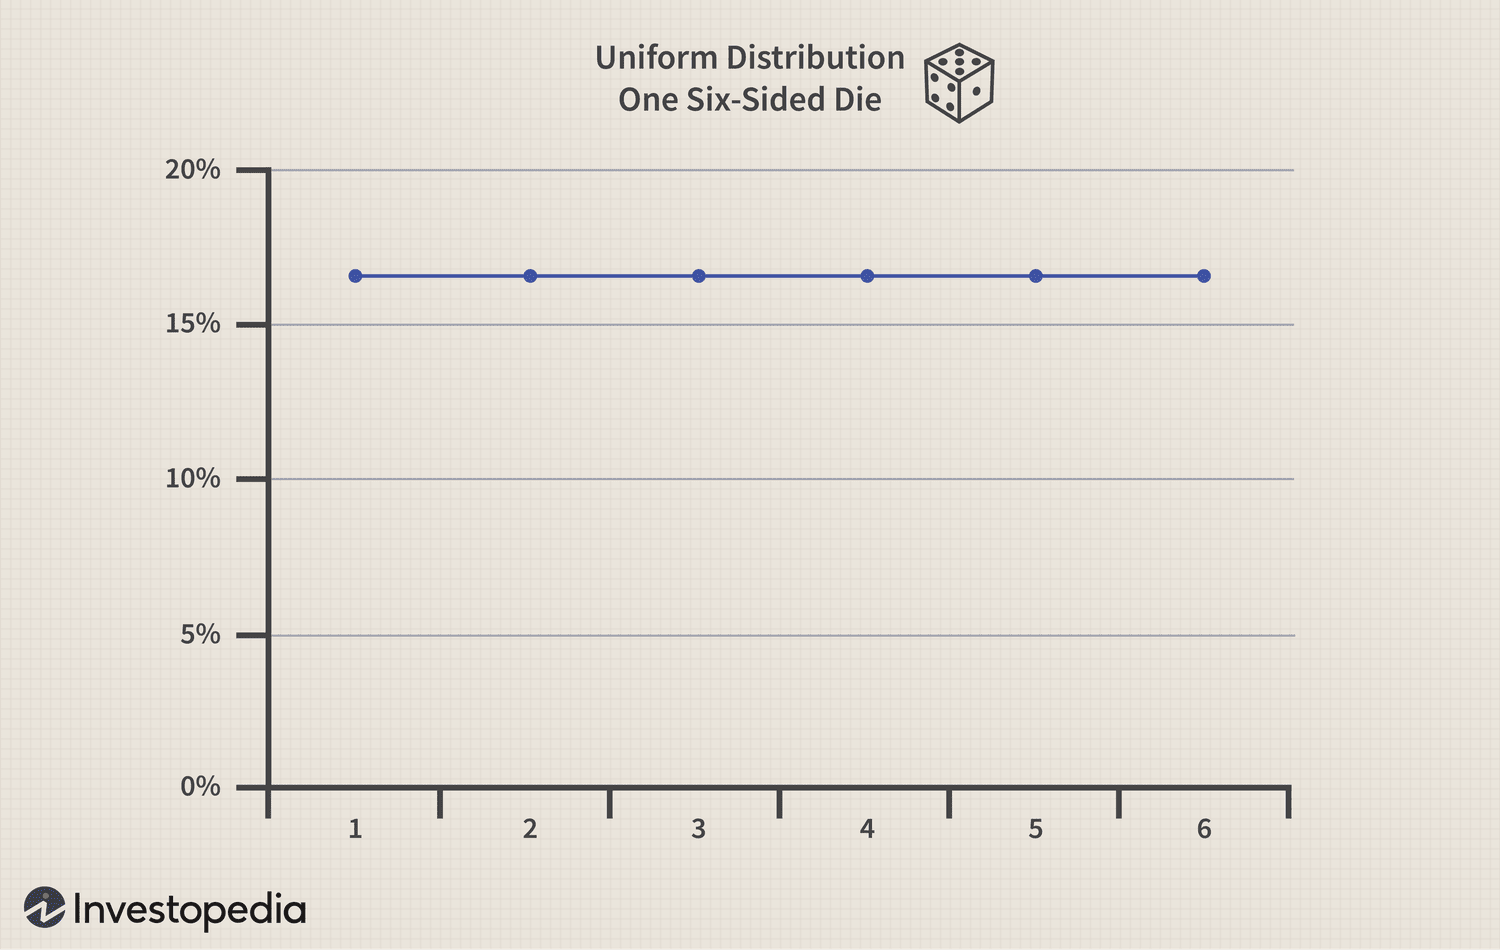

## Predicting the output on the new unseen data

In [83]:
## As we have 8 input features we need to apply 8 independent values to the model. But before providing the values we need to 
## standardize the values

scaler.transform([[10,40,6,2,10000,4,30,-100]])

C:\Users\nekarri\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 3.21349082,  0.90395244,  0.23657034,  2.0852084 ,  7.54035312,
         0.07799345, -2.64118115,  9.76384159]])

In [84]:
x_new=scaler.transform([[10,40,6,2,654,4,30,-100]])

C:\Users\nekarri\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [85]:
x_new

array([[ 3.21349082,  0.90395244,  0.23657034,  2.0852084 , -0.67936508,
         0.07799345, -2.64118115,  9.76384159]])

In [86]:
## Now we will use regressor object to predict the output "MedHouseVal"

regressor.predict(x_new) ## Predicted output for new data

array([[-0.5596093]])

## Important note

In Real time we won't develop the code again and again for the one problem statement. We will develop the code one time by training the model with good amount of data and later we will pickle the files using the "pickle" module.And we use that pickle file to deploy under the cloud environment without incolving in the training process again.

### Pickling:

"Pickling" a model refers to the process of serializing the model object into a format that can be easily saved to a file or transmitted over a network. The term "pickling" comes from the Python programming language, which has a standard library module called pickle for this purpose.

In the context of machine learning, pickling a model allows you to save the trained model to a file so that you can later load it and use it for making predictions on new data without having to retrain the model. This is particularly useful when you have invested time and computational resources into training a model, and you want to deploy or share that model without going through the training process again.

In [87]:
## we have regressor model

regressor

LinearRegression()

In [88]:
## Let's pickle our regression model

import pickle

# pickle.dump(what_are_we_dumping, where_are_we_dumping_it)

pickle.dump(regressor,open("regressor.pkl","wb"))

## Pickle dumping is done, Now a .pkl file with name regressor.pkl is saved in our working directory.

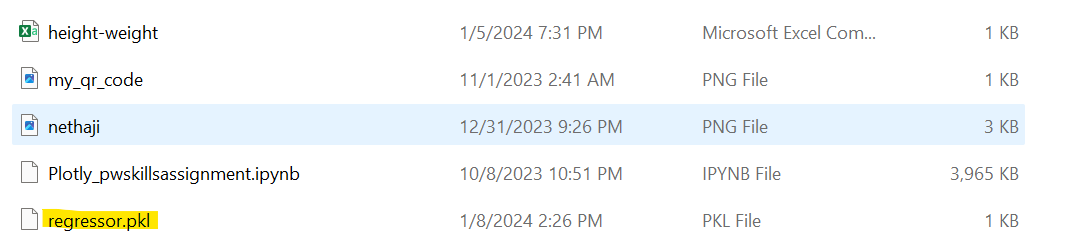

In [89]:
## Now again we can extract the model from the pickel file by unpickling the .pkl file

model= pickle.load(open("regressor.pkl","rb"))

In [90]:
## Now we can use the above model to predict the values for the new data

model.predict(X_test) # Fpr the instance i am predicted the output for the test data

array([[0.71912284],
       [1.76401657],
       [2.70965883],
       ...,
       [4.46877017],
       [1.18751119],
       [2.00940251]])

## More example code and information regarding the pickling process

"Pickling" a model refers to the process of serializing the model object into a format that can be easily saved to a file or transmitted over a network. The term "pickling" comes from the Python programming language, which has a standard library module called pickle for this purpose.

In the context of machine learning, pickling a model allows you to save the trained model to a file so that you can later load it and use it for making predictions on new data without having to retrain the model. This is particularly useful when you have invested time and computational resources into training a model, and you want to deploy or share that model without going through the training process again.

In [91]:
import pickle
from sklearn.linear_model import LinearRegression

# Assume you have a trained model
model = LinearRegression()
# ... train the model ...

# Pickle the model
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# Now, you can later unpickle and use the model
with open('trained_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use the loaded model for predictions
# ... make predictions with loaded_model ...


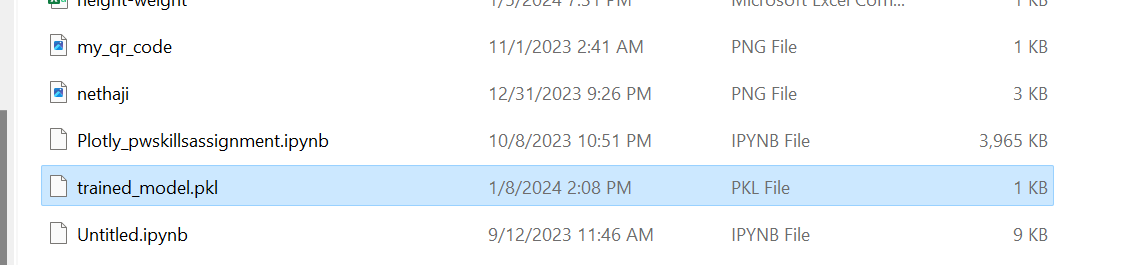

## More about the pickling concept:

Pickle is a module in Python used for serializing and de-serializing Python objects. This converts Python objects like lists, dictionaries, etc. into byte streams (zeroes and ones). You can convert the byte streams back into Python objects through a process called unpickling. Pickling is also known as serialization, flattening, or marshalling.

How to Pickle
The pickle module has two methods.

### pickle.dump()

The pickle.dump() method dumps the Python object in the pickle file. This creates a .pickle file in your current working directory **(pickle.dump(what_are_we_dumping, where_are_we_dumping_it))**:

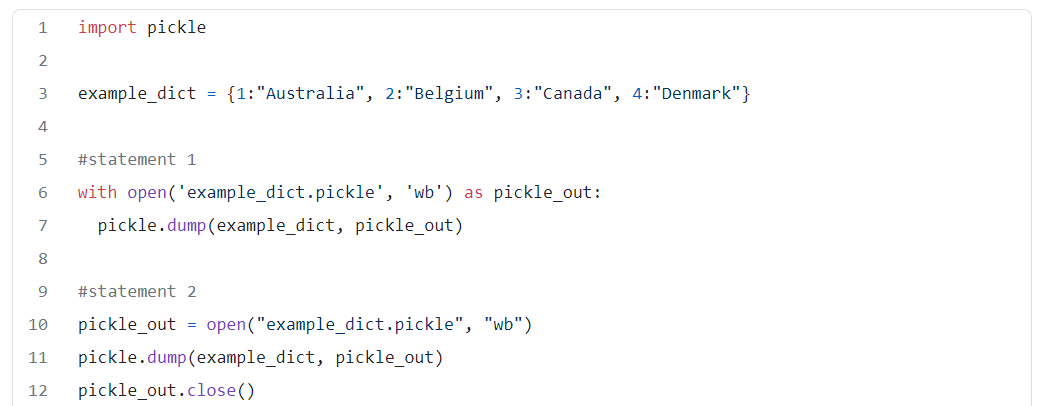

**Unpickling in Python:**:

In Python, deserializing a pickled object entails turning it from its binary representation back to a Python object that can be used in code. This process is known as unpickling. Python’s built-in pickle module has functions for unpickling objects.

In this example, we will load the pickle file in our Python code using the load() function of the pickle module. The pickle.load() function is used to deserialize and unpickle the object from the file. It takes one argument – the file object from which the object should be loaded. The unpickled object is stored in the variable data.

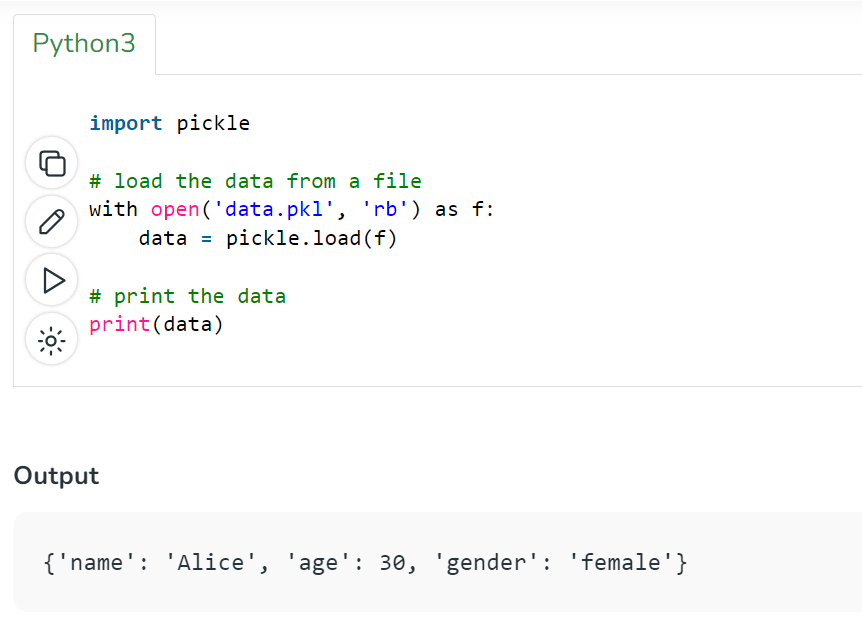

## Differences between pickling and unpickling

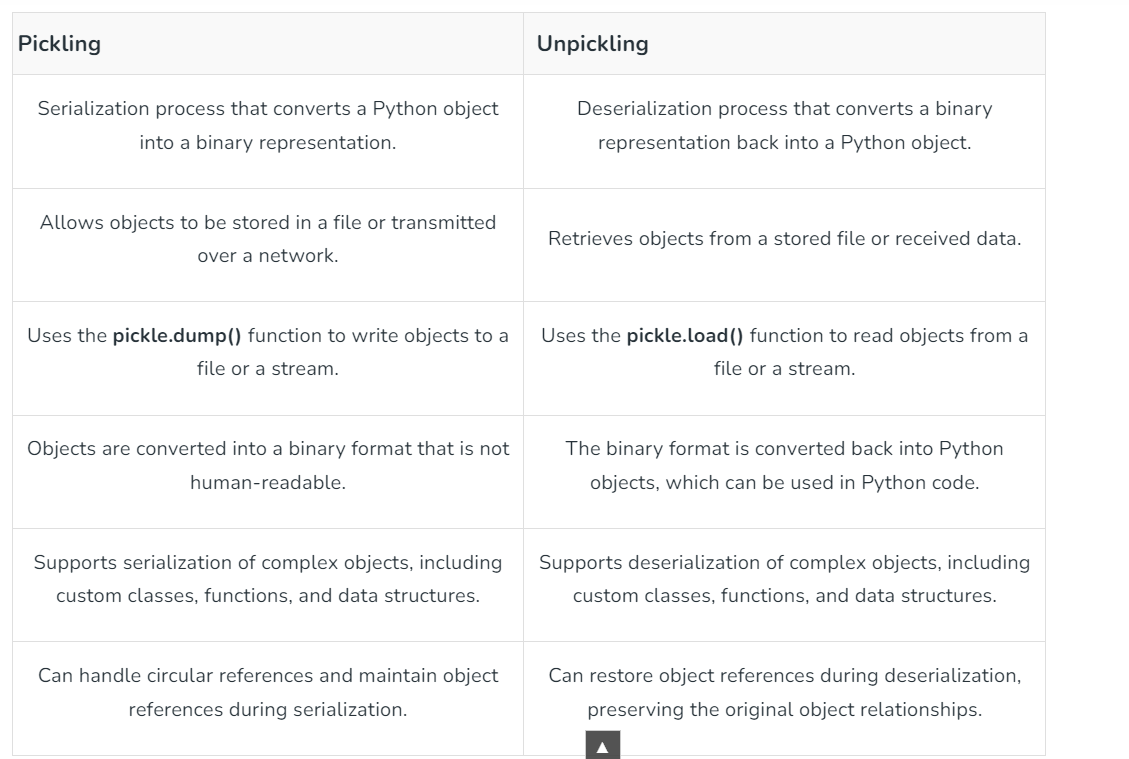

**NOTE:**
    
I think we can pickle the model objects (ex: regressor object) as well as standard scaler objects as well (check once) if we are able to pickle the standard scaler object as well then it is easy to standardize the new unseen data. Once we are done with standardization then we can use the data to predict the outcome.